In [1]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import category_encoders

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Asus\Downloads\Olist.csv')

In [3]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng,order_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,são bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,são paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184121,NaN,NaN,58535,NaN,NaN,congo,PB,-7.795972,-36.661062,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184122,NaN,NaN,15765,NaN,NaN,santana da ponte pensa,SP,-20.253130,-50.798796,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184123,NaN,NaN,61946,NaN,NaN,maranguape,CE,-3.903777,-38.677123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184124,NaN,NaN,64516,NaN,NaN,colonia do piaui,PI,-7.226171,-42.178844,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184126 entries, 0 to 184125
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    178743 non-null  object 
 1   customer_unique_id             178743 non-null  object 
 2   customer_zip_code_prefix       184126 non-null  int64  
 3   customer_city                  178743 non-null  object 
 4   customer_state                 178743 non-null  object 
 5   geolocation_city               183804 non-null  object 
 6   geolocation_state              183804 non-null  object 
 7   geolocation_lat                183804 non-null  float64
 8   geolocation_lng                183804 non-null  float64
 9   order_id                       178743 non-null  object 
 10  order_status                   178743 non-null  object 
 11  order_purchase_timestamp       178743 non-null  object 
 12  order_approved_at             

In [5]:
df.isnull().sum()

customer_id                        5383
customer_unique_id                 5383
customer_zip_code_prefix              0
customer_city                      5383
customer_state                     5383
geolocation_city                    322
geolocation_state                   322
geolocation_lat                     322
geolocation_lng                     322
order_id                           5383
order_status                       5383
order_purchase_timestamp           5383
order_approved_at                  5649
order_delivered_carrier_date       8569
order_delivered_customer_date     10507
order_estimated_delivery_date      5383
review_id                          6879
review_score                       6879
review_comment_title             163089
review_comment_message           109227
review_creation_date               6879
review_answer_timestamp            6879
payment_sequential                 5389
payment_type                       5389
payment_installments               5389


In [6]:
df = df.dropna(subset = ['customer_id'])

In [7]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng,order_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,são bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,são paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178738,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,taboao da serra,SP,-23.615830,-46.768533,9ec0c8947d973db4f4e8dcf1fbfa8f1b,...,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,14802.0,araraquara,SP
178739,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,taboão da serra,SP,-23.615830,-46.768533,9ec0c8947d973db4f4e8dcf1fbfa8f1b,...,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,14802.0,araraquara,SP
178740,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fortaleza,CE,-3.734569,-38.510534,fed4434add09a6f332ea398efd656a5c,...,60.0,575.0,1.0,870.0,25.0,20.0,18.0,3304.0,sao paulo,SP
178741,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,canoas,RS,-29.949839,-51.168494,e31ec91cea1ecf97797787471f98a8c2,...,59.0,452.0,1.0,710.0,19.0,13.0,14.0,14840.0,guariba,SP


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178743 entries, 0 to 178742
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    178743 non-null  object 
 1   customer_unique_id             178743 non-null  object 
 2   customer_zip_code_prefix       178743 non-null  int64  
 3   customer_city                  178743 non-null  object 
 4   customer_state                 178743 non-null  object 
 5   geolocation_city               178421 non-null  object 
 6   geolocation_state              178421 non-null  object 
 7   geolocation_lat                178421 non-null  float64
 8   geolocation_lng                178421 non-null  float64
 9   order_id                       178743 non-null  object 
 10  order_status                   178743 non-null  object 
 11  order_purchase_timestamp       178743 non-null  object 
 12  order_approved_at             

In [9]:
p_c = pd.read_csv(r'C:\Users\Asus\OneDrive\Documents\olist\product_category_name_translation.csv')

In [10]:
p_c

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [11]:
p_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [12]:
p_c.duplicated().sum()

0

In [13]:
p_c.rename(columns = {"product_category_name_english":"product_category"}, inplace=True)

In [14]:
p_c

,product_category_name,product_category
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [15]:
df = df.merge(p_c , on ='product_category_name')

In [16]:
df.drop(columns = 'product_category_name',inplace =True)

In [17]:
df = df.drop(['geolocation_city','geolocation_state'],axis=1)

In [18]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16T15:05:35.000000,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19T16:07:45.000000,...,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,office_furniture
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19T16:07:45.000000,...,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13T16:06:38.000000,...,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,office_furniture
4,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,-2.502220,-44.292314,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08T09:59:19.000000,...,1128.0,1.0,16133.0,63.0,59.0,25.0,8577.0,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174855,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,-23.589305,-46.616961,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08T23:51:49.000000,...,168.0,1.0,100.0,16.0,16.0,16.0,90010.0,porto alegre,RS,fashion_childrens_clothes
174856,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,-23.589305,-46.616961,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08T23:51:49.000000,...,168.0,1.0,100.0,16.0,16.0,16.0,90010.0,porto alegre,RS,fashion_childrens_clothes
174857,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,-11.722454,-61.777036,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26T11:09:00.000000,...,506.0,1.0,1225.0,27.0,35.0,15.0,13403.0,piracicaba,SP,security_and_services
174858,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,71940,brasilia,DF,-15.847310,-47.922777,bede3503afed051733eeb4a84d1adcc5,delivered,2017-09-17T16:51:43.000000,...,461.0,4.0,400.0,26.0,22.0,11.0,12327.0,jacarei,SP,security_and_services


In [19]:
df['geolocation_lat'] = df.groupby(['customer_state'])['geolocation_lat'].transform(lambda x: x.fillna(x.mode()[0]))
df['geolocation_lng'] = df.groupby(['customer_state'])['geolocation_lng'].transform(lambda x: x.fillna(x.mode()[0]))

In [20]:
no_orders_items = df[df['order_item_id'].isna()]
no_orders_items

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category


In [21]:
no_orders_items[no_orders_items['order_item_id'].isna()]['order_status'].value_counts()

Series([], Name: order_status, dtype: int64)

In [22]:
df[df['order_item_id'].isnull()]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category


In [23]:
df = df.dropna(subset=['order_item_id'])

In [24]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16T15:05:35.000000,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,office_furniture
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19T16:07:45.000000,...,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,office_furniture
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19T16:07:45.000000,...,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13T16:06:38.000000,...,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,office_furniture
4,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,-2.502220,-44.292314,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08T09:59:19.000000,...,1128.0,1.0,16133.0,63.0,59.0,25.0,8577.0,itaquaquecetuba,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174855,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,-23.589305,-46.616961,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08T23:51:49.000000,...,168.0,1.0,100.0,16.0,16.0,16.0,90010.0,porto alegre,RS,fashion_childrens_clothes
174856,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,-23.589305,-46.616961,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08T23:51:49.000000,...,168.0,1.0,100.0,16.0,16.0,16.0,90010.0,porto alegre,RS,fashion_childrens_clothes
174857,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,-11.722454,-61.777036,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26T11:09:00.000000,...,506.0,1.0,1225.0,27.0,35.0,15.0,13403.0,piracicaba,SP,security_and_services
174858,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,71940,brasilia,DF,-15.847310,-47.922777,bede3503afed051733eeb4a84d1adcc5,delivered,2017-09-17T16:51:43.000000,...,461.0,4.0,400.0,26.0,22.0,11.0,12327.0,jacarei,SP,security_and_services


In [25]:
df.dropna(subset=['product_category','product_name_lenght', 'product_description_lenght',
'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' ],inplace = True)

In [26]:
df.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
geolocation_lat                       0
geolocation_lng                       0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    22
order_delivered_carrier_date       1853
order_delivered_customer_date      3744
order_estimated_delivery_date         0
review_id                          1450
review_score                       1450
review_comment_title             154095
review_comment_message           101969
review_creation_date               1450
review_answer_timestamp            1450
payment_sequential                    6
payment_type                          6
payment_installments                  6
payment_value                         6
order_item_id                         0


In [27]:
df[['product_weight_g','product_length_cm','product_height_cm','product_width_cm']] = df.groupby(['product_category'])[['product_weight_g','product_length_cm','product_height_cm','product_width_cm']].transform(lambda x: x.fillna(x.mode()[0]))
df[['payment_sequential','payment_type','payment_installments','payment_value']] = df.groupby(['product_category'])[['payment_sequential','payment_type','payment_installments','payment_value']].transform(lambda x: x.fillna(x.mode()[0]))

In [28]:
df['order_approved_at'] = df.groupby(['product_category'])['order_approved_at'].transform(lambda x: x.fillna(x.mode()[0]))

In [29]:
df['order_delivered_carrier_date'] = df.groupby(['order_approved_at'])['order_delivered_carrier_date'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NaT))
df['order_delivered_carrier_date'] = df.groupby(['product_category'])['order_delivered_carrier_date'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NaT))

In [30]:
df['order_delivered_customer_date'] = df.groupby(['order_estimated_delivery_date'])['order_delivered_customer_date'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NaT))
df['order_delivered_customer_date'] = df.groupby(['product_category'])['order_delivered_customer_date'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NaT))


In [31]:
df.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
geolocation_lat                       0
geolocation_lng                       0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
review_id                          1450
review_score                       1450
review_comment_title             154095
review_comment_message           101969
review_creation_date               1450
review_answer_timestamp            1450
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0


In [32]:
review_df = df[['review_id','review_score','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp']]
df = df.drop(columns=['review_id','review_score','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'])

In [33]:
review_df

,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26T00:00:00.000000,2017-05-30T22:34:40.000000
1,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15T00:00:00.000000,2018-06-15T12:10:59.000000
2,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15T00:00:00.000000,2018-06-15T12:10:59.000000
3,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29T00:00:00.000000,2018-04-02T18:36:47.000000
4,2518803238cabbf63564593e4a8fc52d,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09T00:00:00.000000,2018-08-14T11:40:54.000000
...,...,...,...,...,...,...
174855,549f0948d29acee5033f72e52f07dc8e,5.0,NaN,NaN,2017-10-17T00:00:00.000000,2017-10-21T01:21:12.000000
174856,549f0948d29acee5033f72e52f07dc8e,5.0,NaN,NaN,2017-10-17T00:00:00.000000,2017-10-21T01:21:12.000000
174857,82ec4a1c6f0134f607033e23431ee298,4.0,NaN,Envio muito rápido. Recomendo.,2017-02-15T00:00:00.000000,2017-02-16T02:54:35.000000
174858,1067a7f22781153115958799dc72a8df,1.0,NaN,"boa tarde produto enviado errado, terei que me...",2017-09-29T00:00:00.000000,2017-09-30T20:49:37.000000


In [34]:
df.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_lat                  0
geolocation_lng                  0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm   

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174859 entries, 0 to 174859
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    174859 non-null  object 
 1   customer_unique_id             174859 non-null  object 
 2   customer_zip_code_prefix       174859 non-null  int64  
 3   customer_city                  174859 non-null  object 
 4   customer_state                 174859 non-null  object 
 5   geolocation_lat                174859 non-null  float64
 6   geolocation_lng                174859 non-null  float64
 7   order_id                       174859 non-null  object 
 8   order_status                   174859 non-null  object 
 9   order_purchase_timestamp       174859 non-null  object 
 10  order_approved_at              174859 non-null  object 
 11  order_delivered_carrier_date   174859 non-null  object 
 12  order_delivered_customer_date 

In [36]:
dtype_changes = {
    'customer_zip_code_prefix': int,
    'order_purchase_timestamp': 'datetime64[ns]',
    'order_approved_at': 'datetime64[ns]',
    'order_delivered_carrier_date': 'datetime64[ns]',
    'order_delivered_customer_date': 'datetime64[ns]',
    'order_estimated_delivery_date': 'datetime64[ns]',
    'payment_sequential': int,
    'payment_installments': int,
    'payment_value': float,
    'order_item_id': int,
    'product_name_lenght': int,  # Corrected column name
    'product_description_lenght': int,
    'product_photos_qty': int,
    'product_weight_g': int,
    'product_length_cm': int,
    'product_height_cm': int,
    'product_width_cm': int,
    'seller_zip_code_prefix': int,
}


# Apply the data type changes to the DataFrame
for column, dtype in dtype_changes.items():
    df[column] = df[column].astype(dtype)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174859 entries, 0 to 174859
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    174859 non-null  object        
 1   customer_unique_id             174859 non-null  object        
 2   customer_zip_code_prefix       174859 non-null  int32         
 3   customer_city                  174859 non-null  object        
 4   customer_state                 174859 non-null  object        
 5   geolocation_lat                174859 non-null  float64       
 6   geolocation_lng                174859 non-null  float64       
 7   order_id                       174859 non-null  object        
 8   order_status                   174859 non-null  object        
 9   order_purchase_timestamp       174859 non-null  datetime64[ns]
 10  order_approved_at              174859 non-null  datetime64[ns]
 11  

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

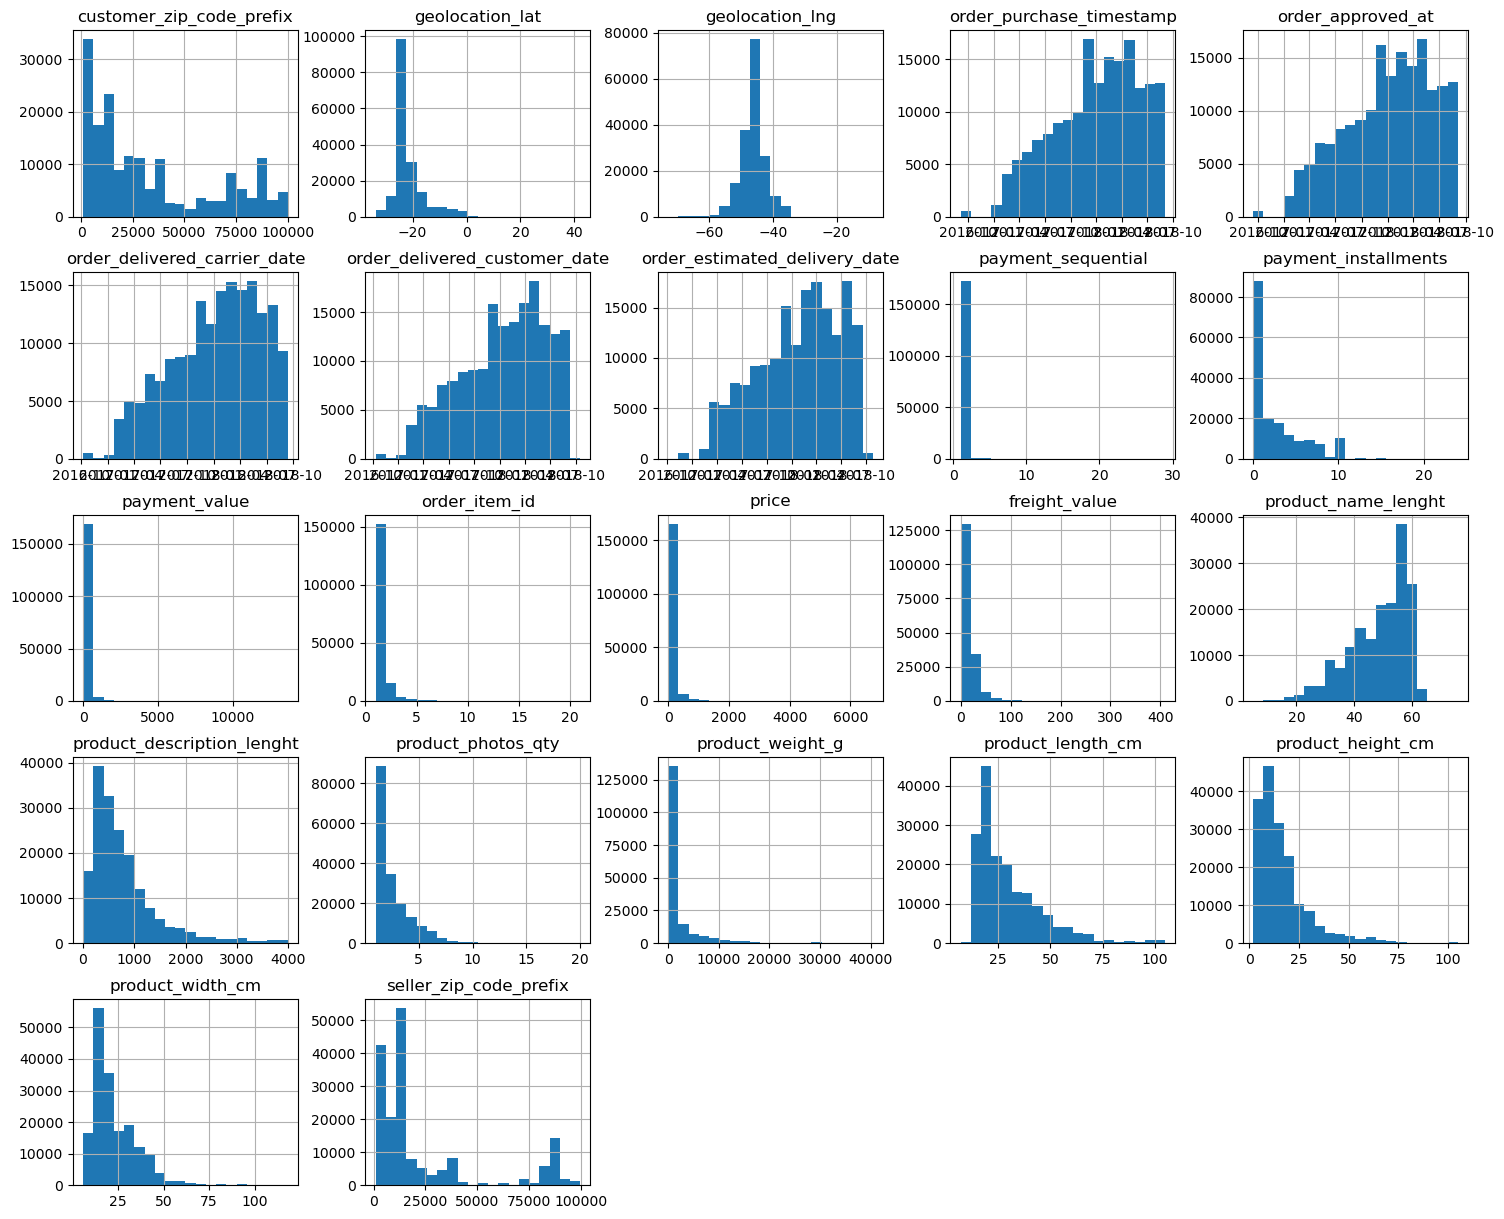

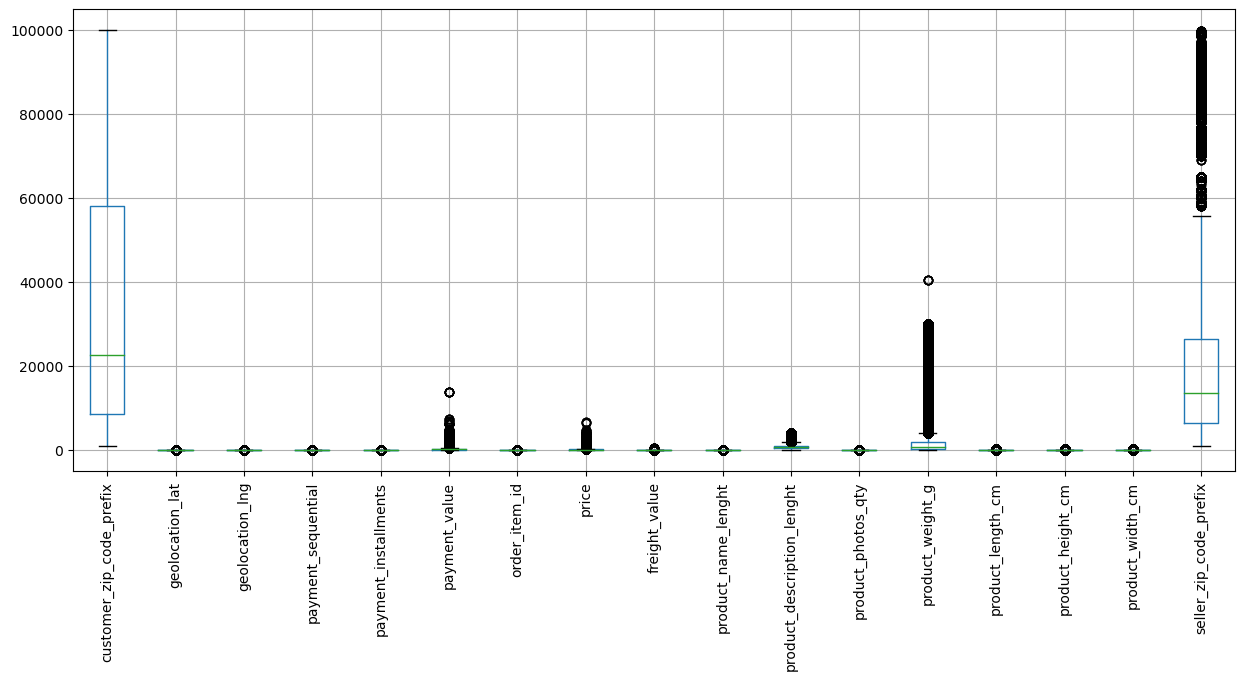

In [39]:
df.hist(bins=20, figsize=(18, 15))
plt.show()

# Box plots for numeric columns
df.boxplot(figsize=(15, 6))
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='order_status', ylabel='count'>

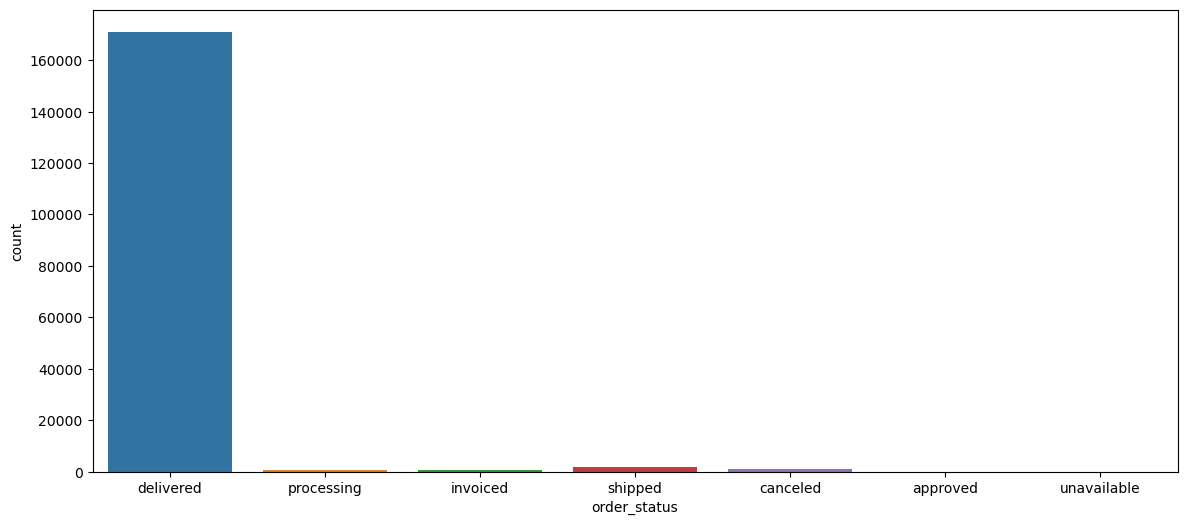

In [40]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(df, x='order_status', ax=ax)

In [41]:
df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year)
df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month)
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))
df['order_purchase_date'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

df['order_purchase_day'] = df['order_purchase_timestamp'].apply(lambda x: x.day)
df['order_purchase_dayofweek'] = df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

df['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'], hours_bins, labels=hours_labels)

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22T15:22:12.000000,124.99,21.88,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,office_furniture,2017,5,May,2017-05,20170516,16,1,Tue,15,Afternoon
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05T16:19:10.000000,139.94,17.79,55,955,1,8267,52,52,17,8577,itaquaquecetuba,SP,office_furniture,2018,5,May,2018-05,20180519,19,5,Sat,16,Afternoon
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05T16:19:10.000000,139.94,17.79,55,955,1,8267,52,52,17,8577,itaquaquecetuba,SP,office_furniture,2018,5,May,2018-05,20180519,19,5,Sat,16,Afternoon
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27T16:31:16.000000,149.94,23.36,48,1066,1,12160,56,51,28,8577,itaquaquecetuba,SP,office_furniture,2018,3,Mar,2018-03,20180313,13,1,Tue,16,Afternoon
4,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,-2.502220,-44.292314,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16,1,credit_card,6,315.75,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26T10:30:15.000000,199.98,115.77,43,1128,1,16133,63,59,25,8577,itaquaquecetuba,SP,office_furniture,2018,7,Jul,2018-07,20180708,8,6,Sun,9,Morning


In [42]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22T15:22:12.000000,124.99,21.88,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,office_furniture,2017,5,May,2017-05,20170516,16,1,Tue,15,Afternoon
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05T16:19:10.000000,139.94,17.79,55,955,1,8267,52,52,17,8577,itaquaquecetuba,SP,office_furniture,2018,5,May,2018-05,20180519,19,5,Sat,16,Afternoon
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05T16:19:10.000000,139.94,17.79,55,955,1,8267,52,52,17,8577,itaquaquecetuba,SP,office_furniture,2018,5,May,2018-05,20180519,19,5,Sat,16,Afternoon
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27T16:31:16.000000,149.94,23.36,48,1066,1,12160,56,51,28,8577,itaquaquecetuba,SP,office_furniture,2018,3,Mar,2018-03,20180313,13,1,Tue,16,Afternoon
4,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,-2.502220,-44.292314,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16,1,credit_card,6,315.75,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26T10:30:15.000000,199.98,115.77,43,1128,1,16133,63,59,25,8577,itaquaquecetuba,SP,office_furniture,2018,7,Jul,2018-07,20180708,8,6,Sun,9,Morning


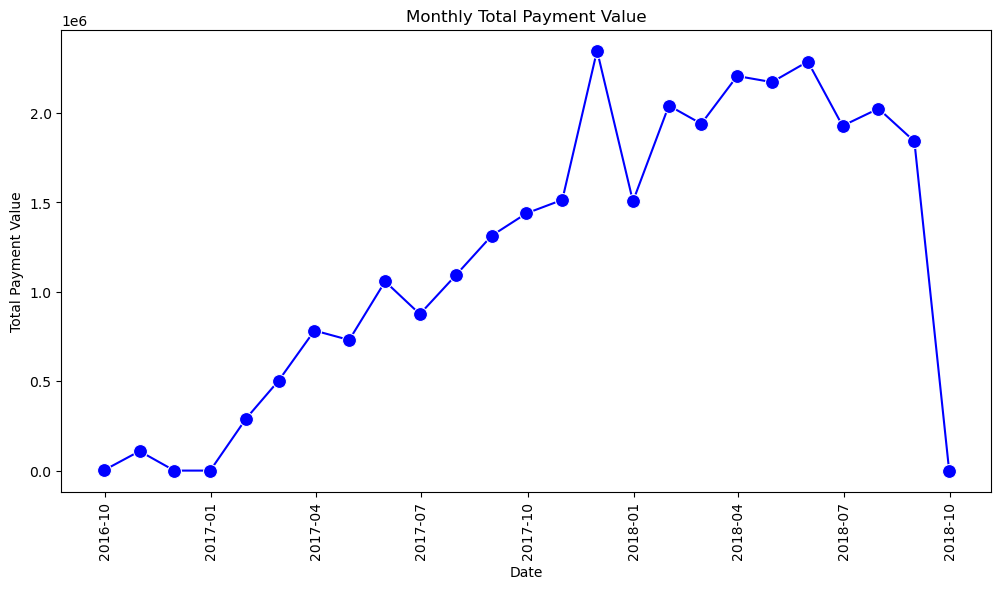

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set 'order_purchase_timestamp' as the index and resample by month while summing 'payment_value'
monthly_payment_sum = df.set_index('order_purchase_timestamp')['payment_value'].resample('M').sum()

# Create a line plot for monthly total payment value
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_payment_sum.index, y=monthly_payment_sum.values, marker='o', markersize=10, color='b')

plt.title('Monthly Total Payment Value')
plt.xlabel('Date')
plt.ylabel('Total Payment Value')
plt.xticks(rotation=90)
plt.show()


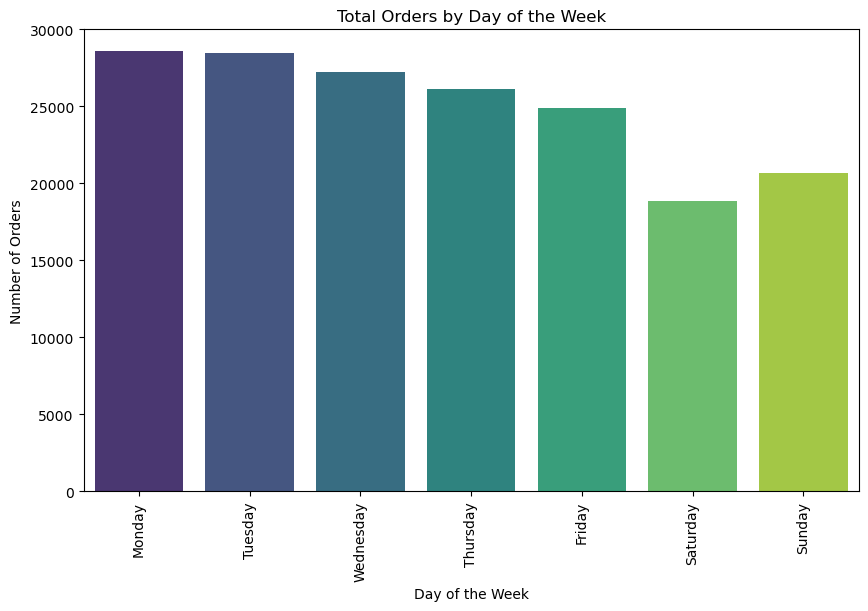

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the day of the week from the 'order_purchase_timestamp' column (0 = Monday, 6 = Sunday)
df['order_day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek

# Group the data by the day of the week and count the number of orders
orders_by_day_of_week = df['order_day_of_week'].value_counts().sort_index()

# Define the day labels for the plot
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot for orders by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_labels, y=orders_by_day_of_week, palette="viridis")

plt.title('Total Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


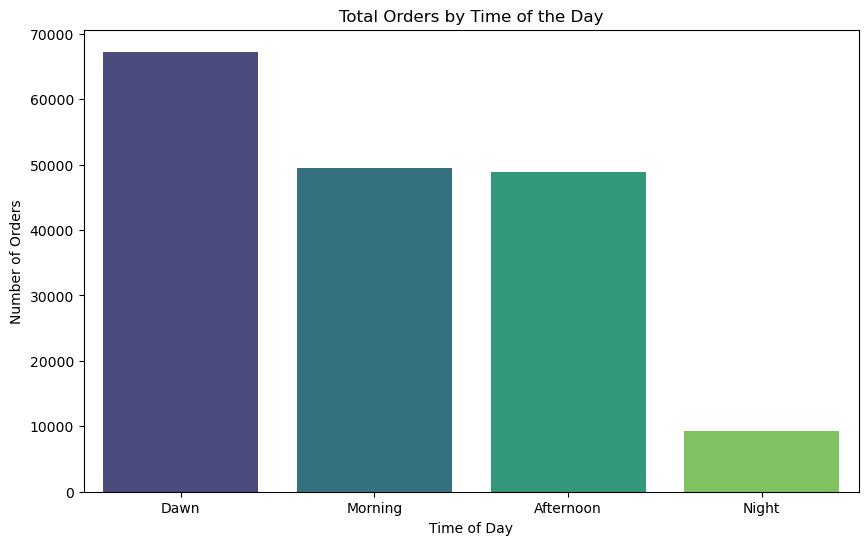

In [45]:

orders_by_time_of_day = df['order_purchase_time_day'].value_counts()

# Define the order of time of day labels
time_of_day_order = ['Dawn', 'Morning', 'Afternoon', 'Night']

# Create a bar plot for orders by time of the day
plt.figure(figsize=(10, 6))
sns.barplot(x=time_of_day_order, y=orders_by_time_of_day, palette="viridis")

plt.title('Total Orders by Time of the Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.show()

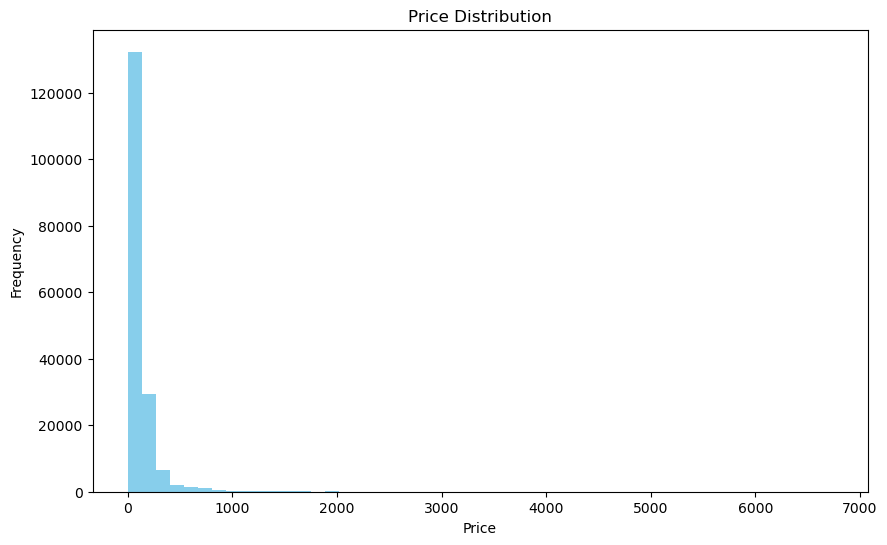

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


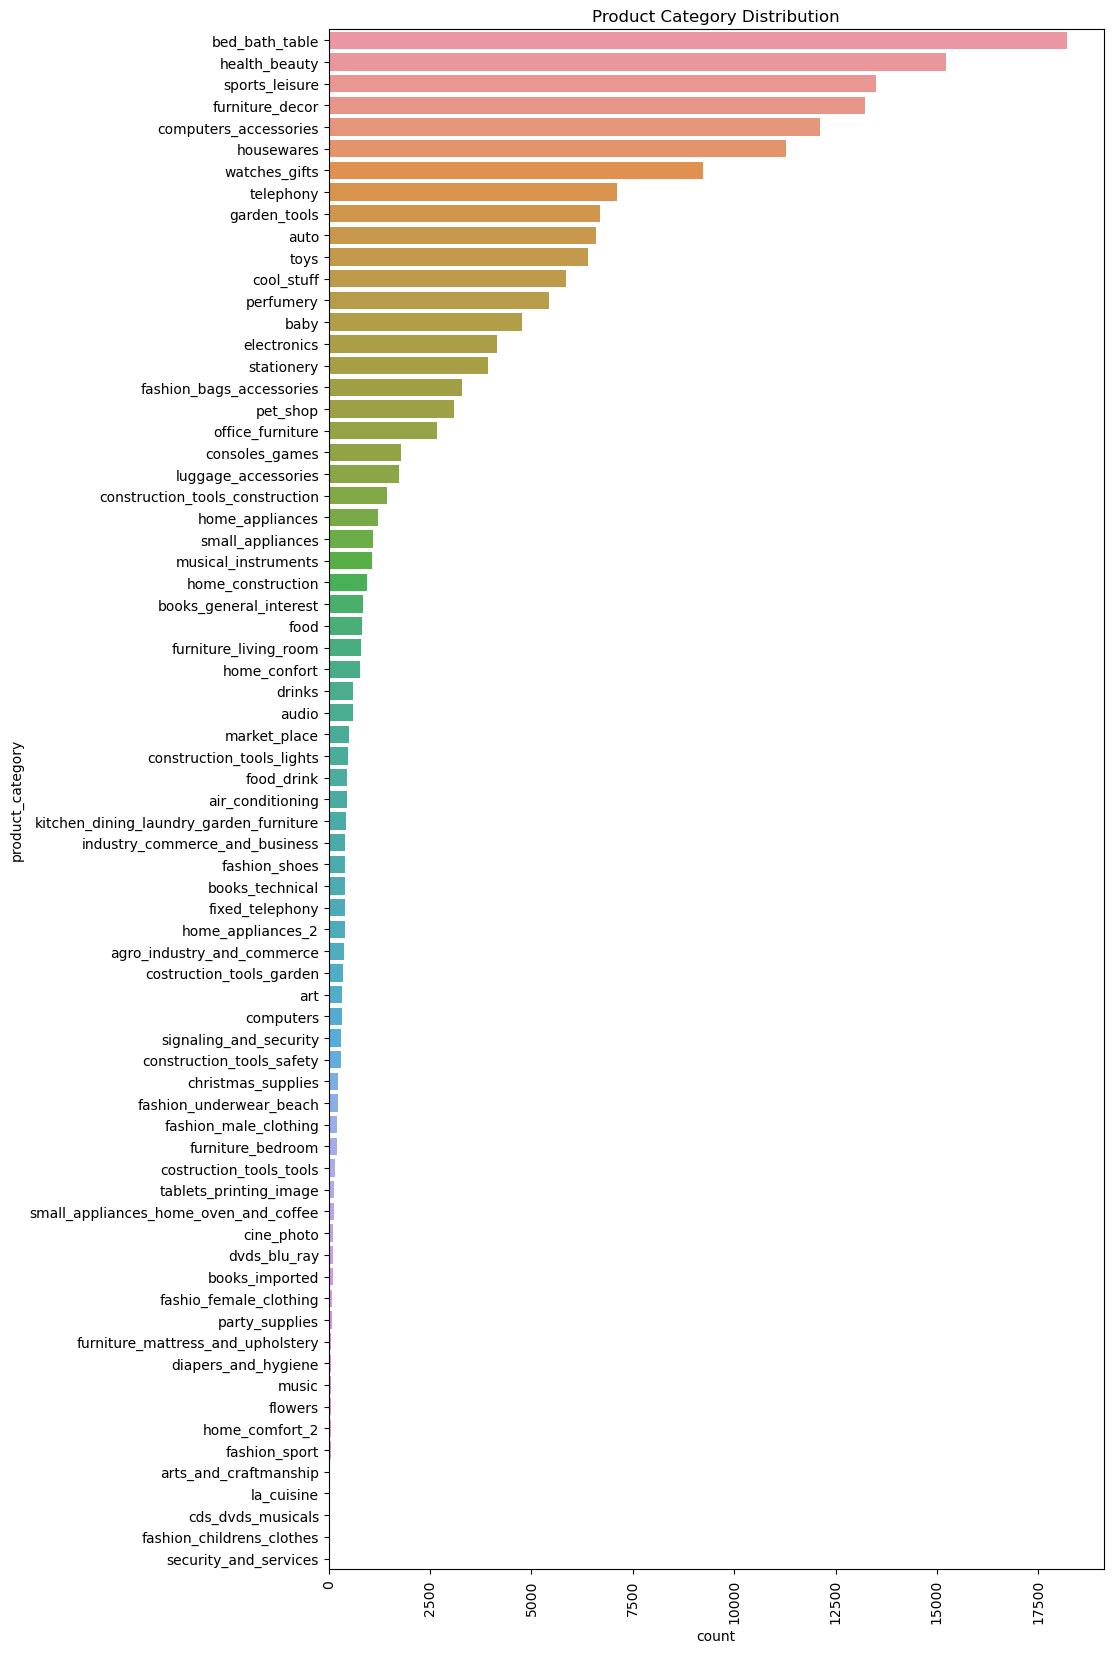

In [47]:
plt.figure(figsize=(10, 20))
sns.countplot(data=df, y='product_category', order=df['product_category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xticks(rotation=90)
plt.show()

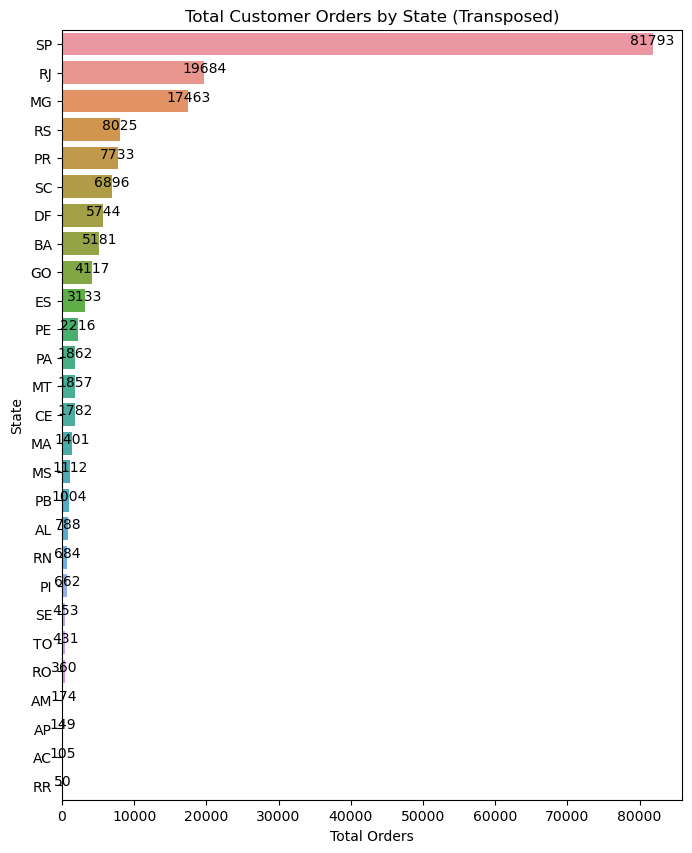

In [48]:

orders_by_state = df.groupby('customer_state')['order_id'].count().reset_index()

# Sorting the data by order count in descending order
orders_by_state = orders_by_state.sort_values(by='order_id', ascending=False)

# Creating a transposed bar plot
plt.figure(figsize=(8, 10))  # Adjust the figure size to accommodate the transposed plot
ax = sns.barplot(x='order_id', y='customer_state', data=orders_by_state)

plt.xlabel('Total Orders')
plt.ylabel('State')
plt.title('Total Customer Orders by State (Transposed)')

# Annotate the bars with their respective counts
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height() / 2, f'{int(width)}', ha="center")

plt.show()



In [49]:
# Define a dictionary to map states to regions
state_to_region = {
    'DF': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'AL': 'Nordeste',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RN': 'Nordeste',
    'SE': 'Nordeste',
    'AC': 'Norte',
    'AP': 'Norte',
    'AM': 'Norte',
    'PA': 'Norte',
    'RO': 'Norte',
    'RR': 'Norte',
    'TO': 'Norte',
    'ES': 'Sudeste',
    'MG': 'Sudeste',
    'RJ': 'Sudeste',
    'SP': 'Sudeste',
    'PR': 'Sul',
    'RS': 'Sul',
    'SC': 'Sul'
}

# Map states to regions and create a new 'region' column
df['region'] = df['customer_state'].map(state_to_region)

# Now, your DataFrame will have a new 'region' column categorizing states into regions


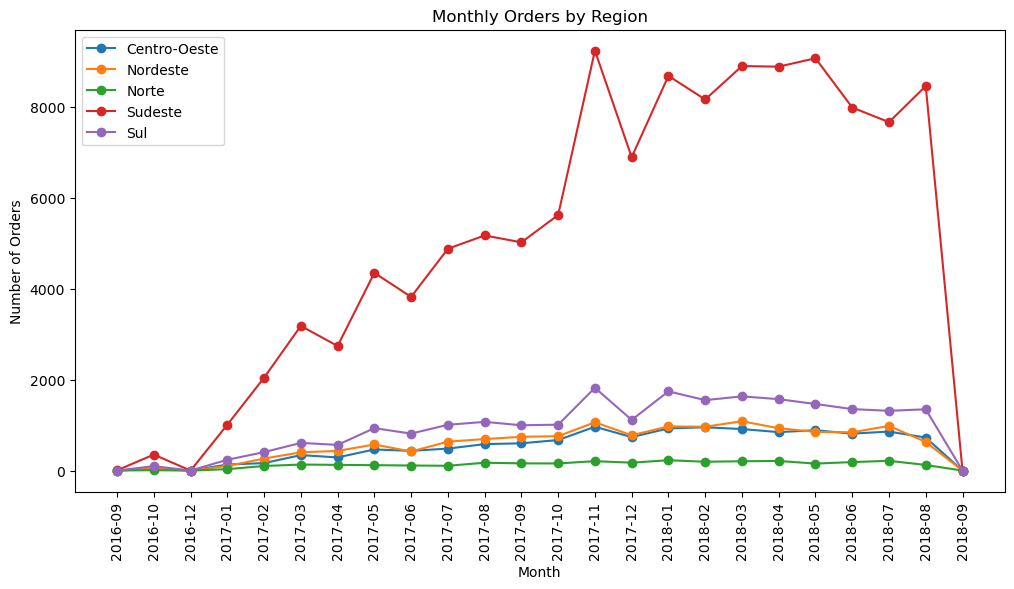

In [50]:
region_monthly_orders = df.groupby(['region', 'order_purchase_year_month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))

for region in region_monthly_orders.index:
    plt.plot(region_monthly_orders.columns, region_monthly_orders.loc[region], label=region, linestyle='-', marker='o')

plt.title('Monthly Orders by Region')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend()
plt.xticks(rotation=90)
plt.show()


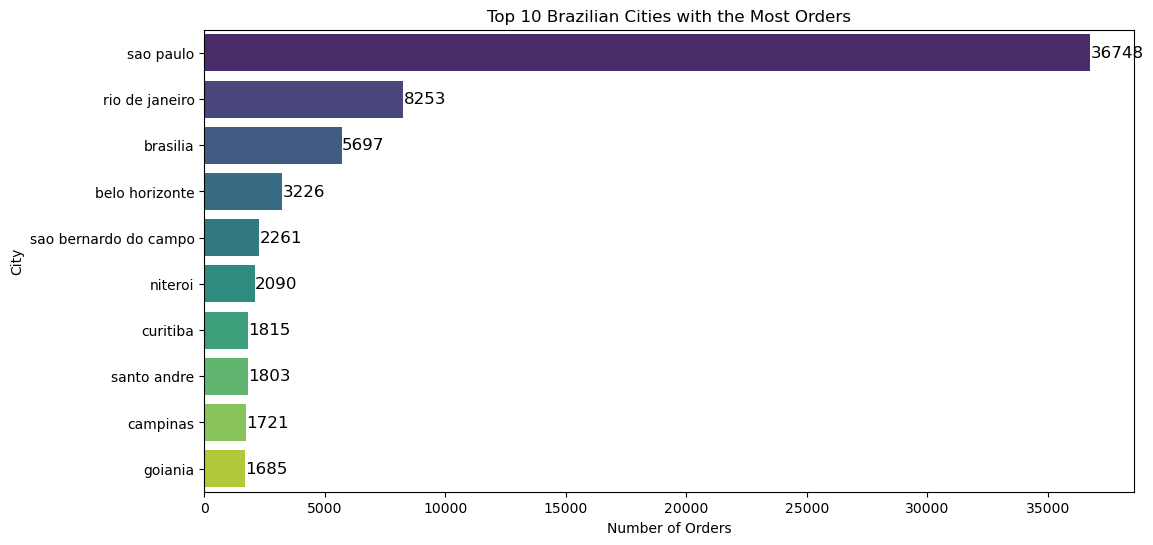

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by city and count the number of orders
city_order_counts = df['customer_city'].value_counts()

# Select the top 10 cities with the most orders
top_10_cities = city_order_counts.head(10)

# Create a bar plot for the top 10 cities with count annotations
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette="viridis")

plt.title('Top 10 Brazilian Cities with the Most Orders')
plt.xlabel('Number of Orders')
plt.ylabel('City')

# Annotate the bars with their respective counts
for i, v in enumerate(top_10_cities.values):
    ax.text(v + 20, i, str(v), va='center', fontsize=12, color='black')

plt.show()


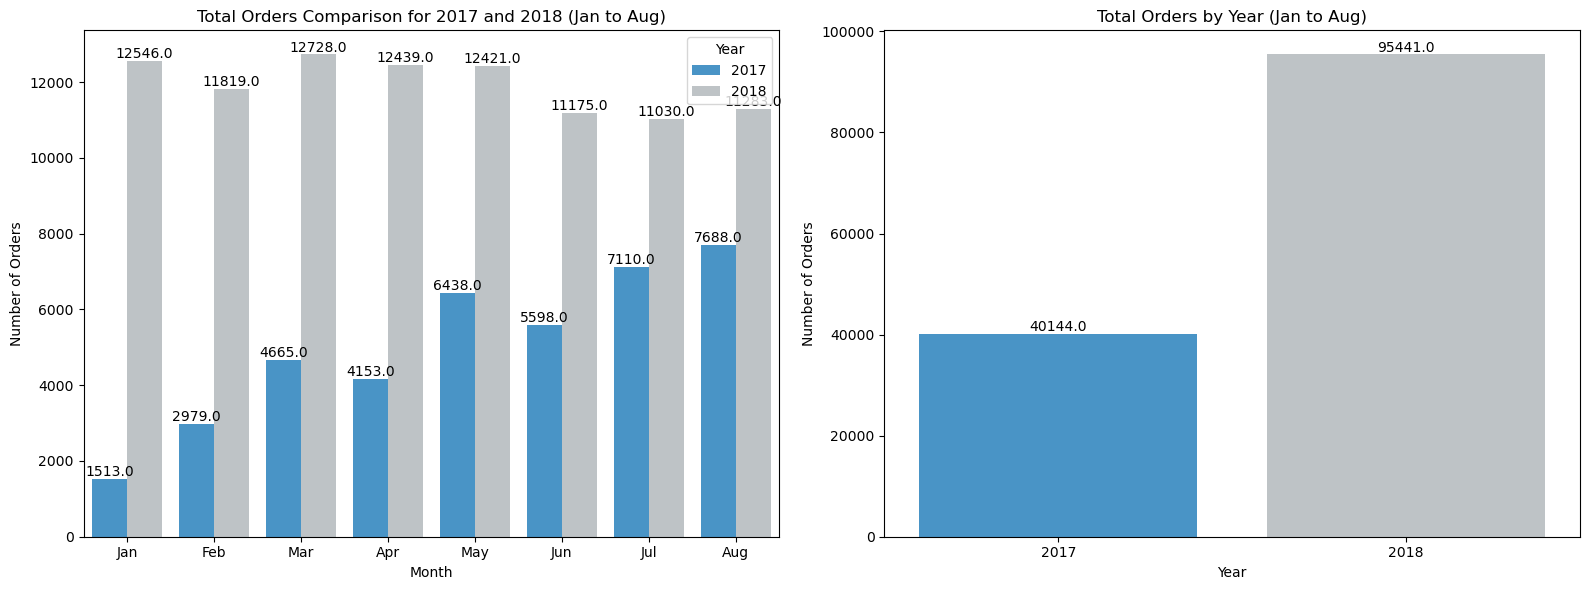

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with blue and cement colors
custom_palette = ['#3498db', '#bdc3c7']

# Filter the DataFrame for orders in 2017 and 2018 for January to August
filtered_df = df[(df['order_purchase_year'].isin([2017, 2018])) & (df['order_purchase_month_name'].isin(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']))]

# Create a numeric month column based on 'order_purchase_month_name'
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8}
filtered_df['order_purchase_month_numeric'] = filtered_df['order_purchase_month_name'].map(month_mapping)

# Group the filtered data by year and numeric month and count the number of orders
orders_by_year_month = filtered_df.groupby(['order_purchase_year', 'order_purchase_month_numeric']).size().reset_index(name='count')

# Create a bar plot for the monthly comparison with the custom color palette
plt.figure(figsize=(16, 6))

# Subplot 1: Monthly comparison
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=orders_by_year_month, x='order_purchase_month_numeric', y='count', hue='order_purchase_year', palette=custom_palette)
plt.title('Total Orders Comparison for 2017 and 2018 (Jan to Aug)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Year')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
plt.xticks(range(8), month_labels)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 2, 2)
orders_by_year = filtered_df.groupby('order_purchase_year').size().reset_index(name='count')
ax2 = sns.barplot(data=orders_by_year, x='order_purchase_year', y='count', palette=custom_palette)
plt.title('Total Orders by Year (Jan to Aug)')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


In [53]:
# Grouping data
df_month_aggreg = df.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

,order_purchase_year,order_purchase_year_month,order_id,price,freight_value,price_per_order,freight_per_order
0,2016,2016-09,9,402.33,95.88,44.703333,10.653333
1,2016,2016-10,553,72182.36,10896.93,130.528680,19.705118
2,2016,2016-12,1,10.90,8.72,10.900000,8.720000
3,2017,2017-01,1513,191701.05,26308.98,126.702611,17.388619
4,2017,2017-02,2979,380034.41,59213.88,127.571135,19.877100


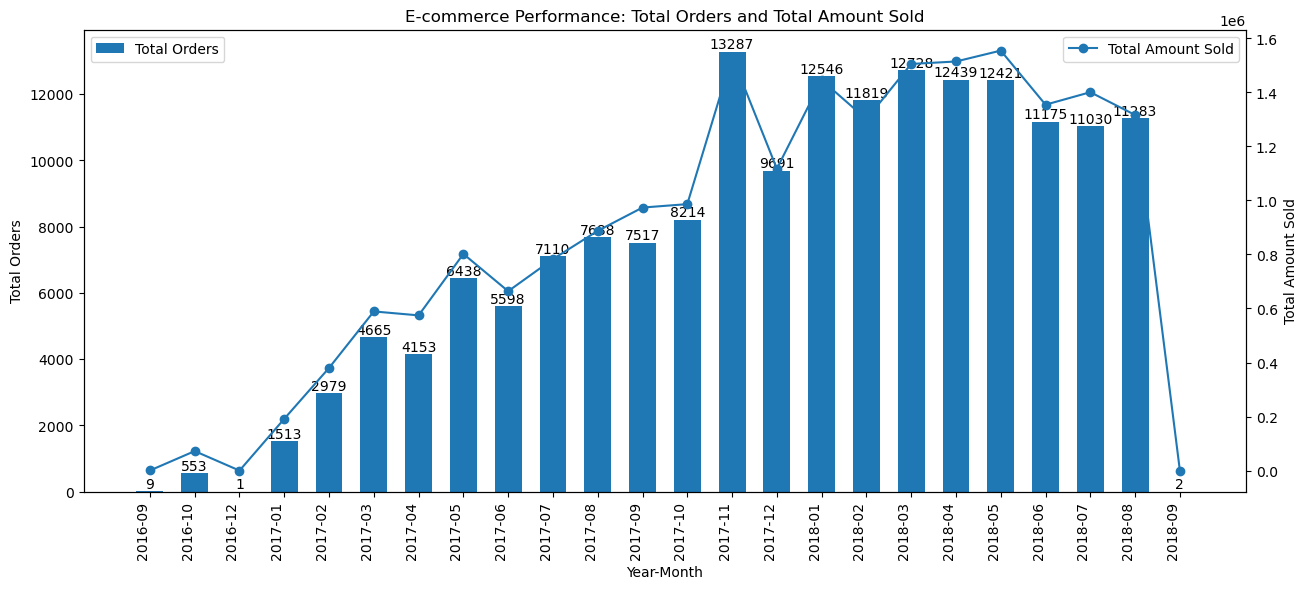

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))

bar_width = 0.6

# Bar chart for total orders
ax.bar(df_month_aggreg['order_purchase_year_month'], df_month_aggreg['order_id'], width=bar_width, label='Total Orders')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Total Orders')
ax.set_xticklabels(df_month_aggreg['order_purchase_year_month'], rotation=90, ha='right')
ax.set_title('E-commerce Performance: Total Orders and Total Amount Sold')

ax2 = ax.twinx()


ax2.plot(df_month_aggreg['order_purchase_year_month'], df_month_aggreg['price'], label='Total Amount Sold', marker='o')
ax2.set_ylabel('Total Amount Sold')


ax.legend(loc='upper left')
ax2.legend(loc='upper right')


for i, v in enumerate(df_month_aggreg['order_id']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


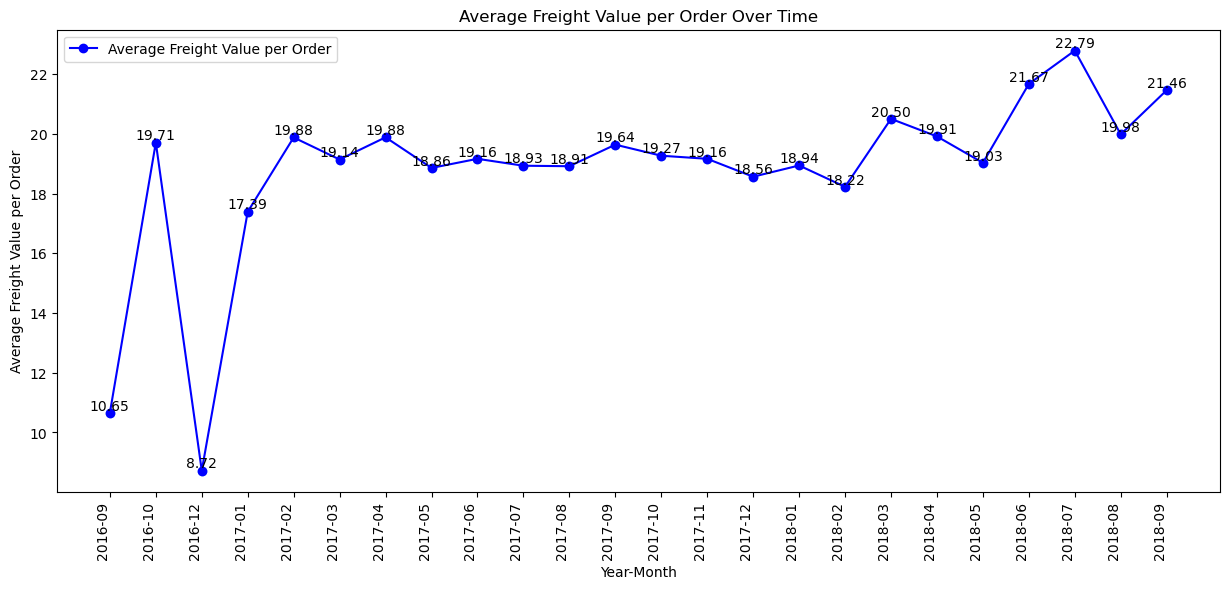

In [55]:

avg_freight_per_order = df_month_aggreg['freight_per_order']

# Create a line plot for the average freight value per order
plt.figure(figsize=(15, 6))
plt.plot(df_month_aggreg['order_purchase_year_month'], avg_freight_per_order, marker='o', color='blue', label='Average Freight Value per Order')
plt.scatter(df_month_aggreg['order_purchase_year_month'], avg_freight_per_order, color='skyblue')
plt.title('Average Freight Value per Order Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Freight Value per Order')
plt.xticks(rotation=90, ha='right')

# Display data values as text above the data points
for i, value in enumerate(avg_freight_per_order):
    plt.text(df_month_aggreg['order_purchase_year_month'][i], value, f'{value:.2f}', ha='center', va='bottom')

plt.legend()
plt.show()


In [56]:
df['region'].unique()

array(['Sudeste', 'Nordeste', 'Sul', 'Centro-Oeste', 'Norte'],
      dtype=object)

In [57]:
mean_price = df.groupby('customer_state')['price'].mean().round(2)
mean_price_sorted = mean_price.sort_values(ascending=True)
sum_price = df.groupby('customer_state')['price'].sum().round(2)
sum_price_sorted = sum_price.sort_values(ascending=True)

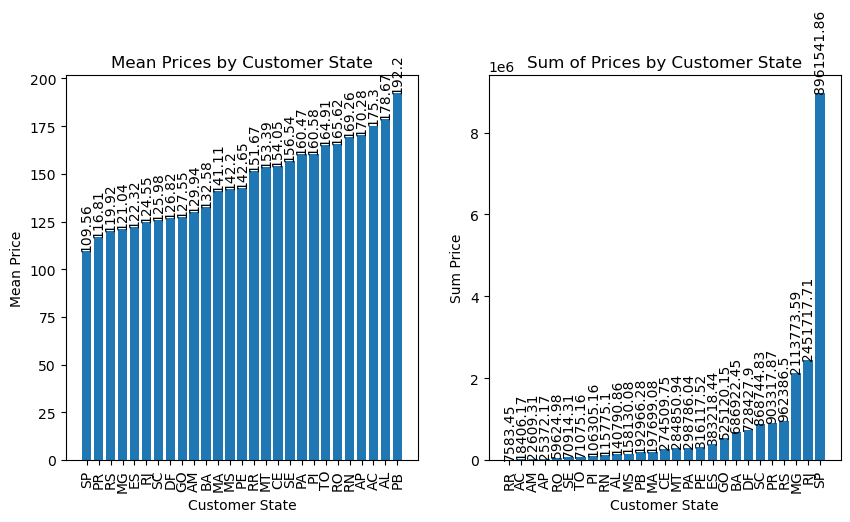

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(mean_price_sorted.index, mean_price_sorted.values)
ax1.set_xticklabels(mean_price_sorted.index, rotation=90)
ax1.set_title('Mean Prices by Customer State')
ax1.set_xlabel('Customer State')
ax1.set_ylabel('Mean Price')
for i, v in enumerate(mean_price_sorted.values):
    ax1.text(i, v, str(v), ha='center', va='bottom', rotation=90)

ax2.bar(sum_price_sorted.index, sum_price_sorted.values)
ax2.set_xticklabels(sum_price_sorted.index, rotation=90)
ax2.set_title('Sum of Prices by Customer State')
ax2.set_xlabel('Customer State')
ax2.set_ylabel('Sum Price')
for i, v in enumerate(sum_price_sorted.values):
    ax2.text(i, v, str(v), ha='center', va='bottom',  rotation=90)

plt.show()


In [59]:
mean_freightprice = df.groupby('customer_state')['freight_value'].mean().round(2)
mean_freightprice_sorted = mean_freightprice.sort_values(ascending=True)
sum_freightprice = df.groupby('customer_state')['freight_value'].sum().round(2)
sum_freightprice_sorted = sum_freightprice.sort_values(ascending=True)

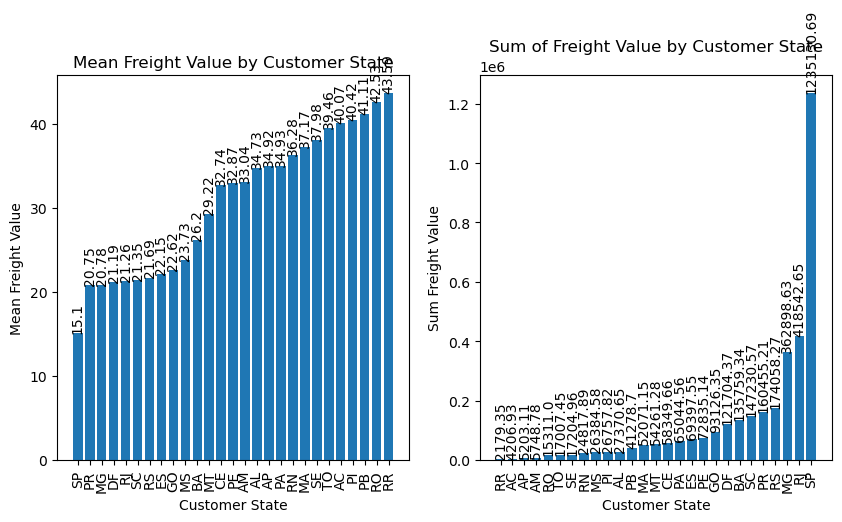

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(mean_freightprice_sorted.index, mean_freightprice_sorted.values)
ax1.set_xticklabels(mean_freightprice_sorted.index, rotation=90)
ax1.set_title('Mean Freight Value by Customer State')
ax1.set_xlabel('Customer State')
ax1.set_ylabel('Mean Freight Value')
for i, v in enumerate(mean_freightprice_sorted.values):
    ax1.text(i, v, str(v), ha='center', va='bottom',  rotation=90)

ax2.bar(sum_freightprice_sorted.index, sum_freightprice_sorted.values)
ax2.set_xticklabels(sum_freightprice_sorted.index, rotation=90)
ax2.set_title('Sum of Freight Value by Customer State')
ax2.set_xlabel('Customer State')
ax2.set_ylabel('Sum Freight Value')
for i, v in enumerate(sum_freightprice_sorted.values):
    ax2.text(i, v, str(v), ha='center', va='bottom',  rotation=90)

plt.show()

In [61]:
state_freight = df.groupby('customer_state')['freight_value'].mean()

In [62]:
top5_fv=state_freight.sort_values(ascending=False).iloc[0:5]

In [63]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,order_day_of_week,region
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22T15:22:12.000000,124.99,21.88,41,1141,1,8683,54,64,31,8577,itaquaquecetuba,SP,office_furniture,2017,5,May,2017-05,20170516,16,1,Tue,15,Afternoon,1,Sudeste
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05T16:19:10.000000,139.94,17.79,55,955,1,8267,52,52,17,8577,itaquaquecetuba,SP,office_furniture,2018,5,May,2018-05,20180519,19,5,Sat,16,Afternoon,5,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05T16:19:10.000000,139.94,17.79,55,955,1,8267,52,52,17,8577,itaquaquecetuba,SP,office_furniture,2018,5,May,2018-05,20180519,19,5,Sat,16,Afternoon,5,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27T16:31:16.000000,149.94,23.36,48,1066,1,12160,56,51,28,8577,itaquaquecetuba,SP,office_furniture,2018,3,Mar,2018-03,20180313,13,1,Tue,16,Afternoon,1,Sudeste
4,4c06b42fbf7b97ab10779cda5549cd1c,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,-2.502220,-44.292314,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16,1,credit_card,6,315.75,1,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26T10:30:15.000000,199.98,115.77,43,1128,1,16133,63,59,25,8577,itaquaquecetuba,SP,office_furniture,2018,7,Jul,2018-07,20180708,8,6,Sun,9,Morning,6,Nordeste


In [64]:
df['time_to_delivery']=df['order_delivered_customer_date'].dt.date-df['order_approved_at'].dt.date

In [65]:
df['time_to_delivery'] = df['time_to_delivery'].apply(lambda x:round(x.days))

In [66]:
df['time_to_delivery']=df['time_to_delivery'].astype('int') 

In [67]:
average_time_todelivery=df.groupby('customer_state')['time_to_delivery'].mean().sort_values(ascending=False)

In [68]:
df['estimation_to_delivery']=df['order_delivered_customer_date'].dt.date-df['order_estimated_delivery_date'].dt.date

In [69]:
df['estimation_to_delivery']=df['estimation_to_delivery'].apply(lambda x:round(x.days))

In [70]:
estimation_delivery=df.groupby('customer_state')['time_to_delivery'].mean().sort_values(ascending=False)

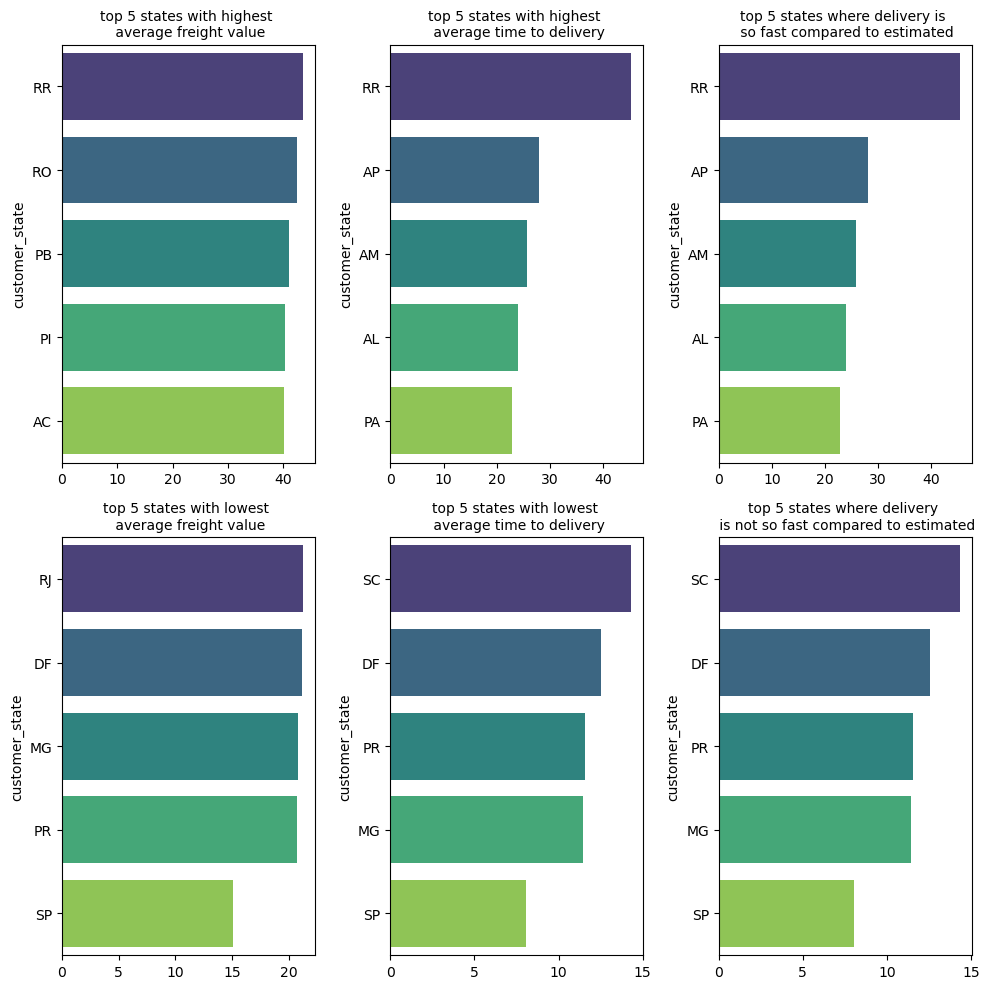

In [71]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.barplot(y=mean_freightprice.sort_values(ascending=False).head().index ,x=mean_freightprice.sort_values(ascending=False).head().values,palette="viridis")
plt.title('top 5 states with highest \n average freight value',fontsize=10)
plt.subplot(2,3,2)
sns.barplot(y=average_time_todelivery.head().index,x=average_time_todelivery.head().values,palette="viridis")
plt.title('top 5 states with highest \n average time to delivery',fontsize=10)
plt.subplot(2,3,3)
sns.barplot(y=estimation_delivery.head().index,x=estimation_delivery.head().values,palette="viridis")
plt.title('top 5 states where delivery is \n so fast compared to estimated',fontsize=10)
plt.subplot(2,3,4)
sns.barplot(y=mean_freightprice.sort_values(ascending=False).tail().index,x=mean_freightprice.sort_values(ascending=False).tail().values,palette="viridis")
plt.title('top 5 states with lowest \n average freight value',fontsize=10)
plt.subplot(2,3,5)
sns.barplot(y=average_time_todelivery.tail().index,x=average_time_todelivery.tail().values,palette="viridis")
plt.title('top 5 states with lowest \n average time to delivery',fontsize=10)
plt.subplot(2,3,6)
sns.barplot(y=estimation_delivery.tail().index,x=estimation_delivery.tail().values,palette="viridis")
plt.title('top 5 states where delivery \n is not so fast compared to estimated',fontsize=10)
plt.tight_layout()
plt.show()

In [72]:
import datetime as dt

In [73]:
present_day = df['order_purchase_timestamp'].max() + dt.timedelta(days=2)

In [74]:
recency_df= pd.DataFrame(df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())

In [75]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)

In [76]:
frequency_df = pd.DataFrame(df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)

In [77]:
monetary_df = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']

In [78]:
rf_df = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')

In [79]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,94087.0,243.904004,153.160238,2.00,120.00,224.00,353.000,730.00
Frequency,94087.0,1.033671,0.208938,1.00,1.00,1.00,1.000,15.00
Monetary,94087.0,318.793494,956.169136,12.28,85.36,156.44,306.785,109312.64


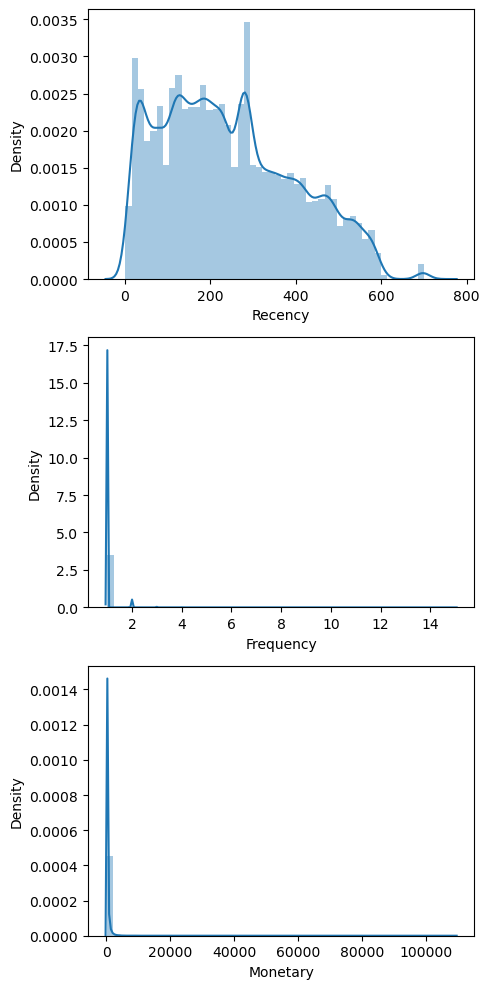

In [80]:
plt.figure(figsize=(5, 10))
plt.subplot(3, 1, 1)
sns.distplot(rfm_df['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(rfm_df['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(rfm_df['Monetary'])
plt.tight_layout()
plt.show()

In [81]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94087 entries, 0 to 94086
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94087 non-null  object 
 1   Recency             94087 non-null  int64  
 2   Frequency           94087 non-null  int64  
 3   Monetary            94087 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.6+ MB


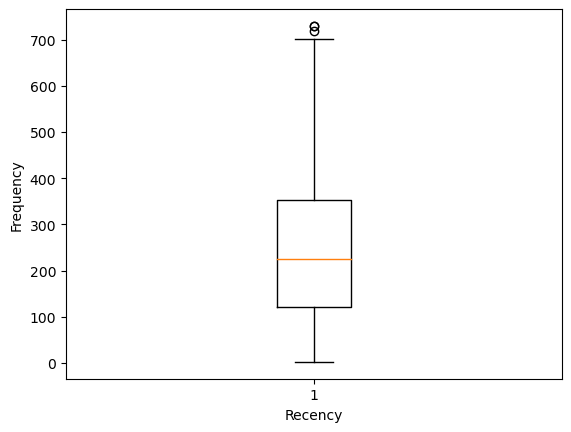

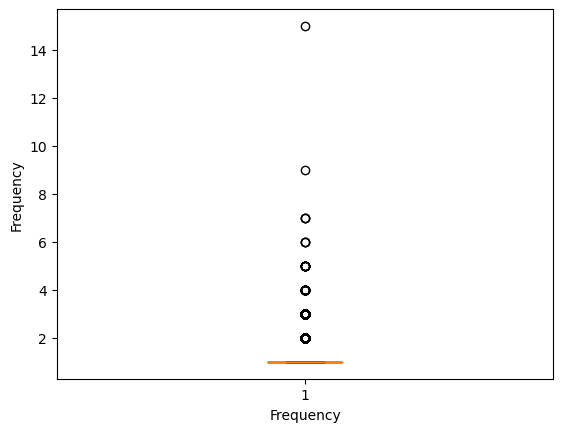

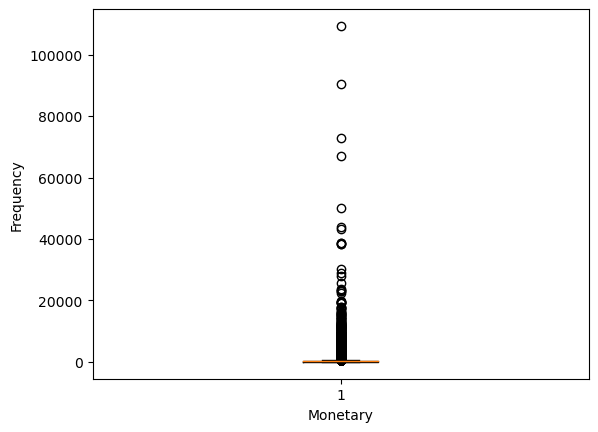

In [82]:
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(rfm_df[i])

In [83]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [84]:
for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(rfm_df, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Int64Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  2849
Indexes:  Int64Index([  105,   121,   141,   244,   307,   407,   422,   431,   441,
              470,
            ...
            93484, 93541, 93641, 93645, 93713, 93757, 93809, 93914, 93931,
            94042],
           dtype='int64', length=2849)
****************************************
Number of outliers in Monetary column:  1041
Indexes:  Int64Index([  199,   222,   227,   257,   258,   419,   440,   542,   574,
              611,
            ...
            93594, 93658, 93723, 93728, 93805, 93904, 93924, 93990, 94075,
            94082],
           dtype='int64', length=1041)
****************************************


In [85]:
rfm_df.shape

(94087, 4)

In [86]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [87]:
for i in ["Recency", "Monetary",'Frequency']:
    remove_outlier(rfm_df, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************
Outliers in the Frequency column have been removed
****************************************


In [88]:
rfm_df.shape

(90313, 4)

In [89]:
rfm_df2= rfm_df.copy()
rfm_df2= rfm_df.set_index('customer_unique_id')

In [90]:
rfm_df2["recency_score"]  = pd.qcut(rfm_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df2["frequency_score"]= pd.qcut(rfm_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df2["monetary_score"] = pd.qcut(rfm_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [91]:
rfm_df2['rfm_score'] = rfm_df2.recency_score.astype(str)+ rfm_df2.frequency_score.astype(str) + rfm_df2.monetary_score.astype(str)

In [92]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [93]:
rfm_df2['Segment'] = rfm_df2['recency_score'].astype(str) + rfm_df2['frequency_score'].astype(str) + rfm_df2['monetary_score'].astype(str)
rfm_df2['Segment'] = rfm_df2['Segment'].replace(seg_map, regex=True)

In [94]:
rfm_df2['Segment'].unique()

array(['Promising', 'New Customers', 'Cannot Lose Them',
       'Hibernating customers', 'Lost customers', 'About To Sleep',
       'At Risk', 'Potential Loyalist', 'Need Attention', 'Loyal',
       'Champions'], dtype=object)

In [95]:
rfm_df2['Segment'].nunique()

11

In [96]:
rfm_Stats = rfm_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
rfm_Stats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         285.433385  284.0  184  390   5817       1.0    1.0   
At Risk                393.188003  375.0  275  719  15787       1.0    1.0   
Cannot Lose Them       442.522508  445.0  275  730   5709       1.0    1.0   
Champions               90.932451   87.0    6  183   5211       1.0    1.0   
Hibernating customers  347.723707  332.0  184  730   7930       1.0    1.0   
Lost customers         482.149030  475.0  391  701   4536       1.0    1.0   
Loyal                  182.221430  197.0    7  274   5749       1.0    1.0   
Need Attention         161.979740  182.0    7  274   5775       1.0    1.0   
New Customers          128.206063  132.0    6  274   4882       1.0    1.0   
Potential Loyalist     136.115980  136.0    6  274  17184       1.0    1.0   
Promising              111.669053   98.0    6  274  11733       1.0    1.0   

                                        Monetary                            \
                      min max  count        mean   median     min      max   
Segment                                                                      
About To Sleep          1   1   5817   68.766955   59.740   13.68   190.67   
At Risk                 1   1  15787  346.574399  223.780   72.45  2454.00   
Cannot Lose Them        1   1   5709  413.558720  287.100  120.04  2441.44   
Champions               1   1   5211  522.297342  379.920  190.72  2452.36   
Hibernating customers   1   1   7930  106.574026  102.030   21.09   190.66   
Lost customers          1   1   4536   57.978071   55.855   12.28   120.00   
Loyal                   1   1   5749  470.055653  341.540  120.11  2448.08   
Need Attention          1   1   5775  339.347124  243.480  120.09  2455.12   
New Customers           1   1   4882   70.438122   68.125   13.29   119.88   
Potential Loyalist      1   1  17184   99.661873   95.360   12.89   190.68   
Promising               1   1  11733  350.636085  235.800   16.36  2443.11   

                              
                       count  
Segment                       
About To Sleep          5817  
At Risk                15787  
Cannot Lose Them        5709  
Champions               5211  
Hibernating customers   7930  
Lost customers          4536  
Loyal                   5749  
Need Attention          5775  
New Customers           4882  
Potential Loyalist     17184  
Promising              11733

#### About To Sleep: These customers have not purchased for a long time (mean recency of 285 days), and they have low frequency (mean frequency of 1) and low monetary value (mean monetary of 68). They are likely to be inactive or lost, and they need reactivation campaigns to wake them up.
#### At Risk: These customers have also not purchased for a long time (mean recency of 393 days), but they have high frequency (mean frequency of 1) and high monetary value (mean monetary of 346). They used to be valuable customers, but they have stopped buying recently. They are at risk of churning, and they need incentives or promotions to win them back.
#### Cannot Lose Them: These customers have the highest recency (mean recency of 442 days), which means they have not purchased for the longest time. However, they also have high frequency (mean frequency of 1) and high monetary value (mean monetary of 413). They are the most valuable customers, but they are also the most likely to churn. They need special attention and loyalty rewards to retain them.
#### Champions: These customers have the lowest recency (mean recency of 90 days), which means they have purchased recently. They also have high frequency (mean frequency of 1) and high monetary value (mean monetary of 522). They are the best customers, and they are loyal and engaged. They need recognition and appreciation, and they can be advocates for your brand.
#### Hibernating customers: These customers have high recency (mean recency of 347 days), low frequency (mean frequency of 1), and low monetary value (mean monetary of 106). They are dormant customers who have not purchased for a long time, and they have low spending. They need to be re-engaged with personalized offers or discounts.
#### Lost customers: These customers have the highest recency (mean recency of 482 days), low frequency (mean frequency of 1), and low monetary value (mean monetary of 57). They are the worst customers, and they are likely to be lost forever. They need to be re-acquired with new products or services, or they can be ignored.
#### Loyal: These customers have low recency (mean recency of 182 days), high frequency (mean frequency of 1), and high monetary value (mean monetary of 470). They are loyal customers who buy frequently and spend a lot. They need to be rewarded and encouraged with cross-selling or upselling opportunities.
#### Need Attention: These customers have low recency (mean recency of 161 days), high frequency (mean frequency of 1), and moderate monetary value (mean monetary of 339). They are potential loyal customers who need some attention and care. They need to be stimulated with personalized recommendations or loyalty programs.
#### New Customers: These customers have low recency (mean recency of 128 days), low frequency (mean frequency of 1), and low monetary value (mean monetary of 70). They are new customers who have just made their first purchase. They need to be welcomed and nurtured with relevant content or offers.
#### Potential Loyalist: These customers have low recency (mean recency of 136 days), low frequency (mean frequency of 1), and moderate monetary value (mean monetary of 99). They are promising customers who have the potential to become loyal. They need to be encouraged with cross-selling or upselling offers or referrals.
#### Promising: These customers have low recency (mean recency of 111 days), low frequency (mean frequency of 1), and high monetary value (mean monetary of 350). They are customers who have made a large purchase recently, but have not bought again. They need to be followed up with relevant content or offers to increase their frequency.

In [97]:
rfm_Stats['Ratio']= (100*rfm_Stats['Recency']["count"]/rfm_Stats['Recency']["count"].sum()).round(2)

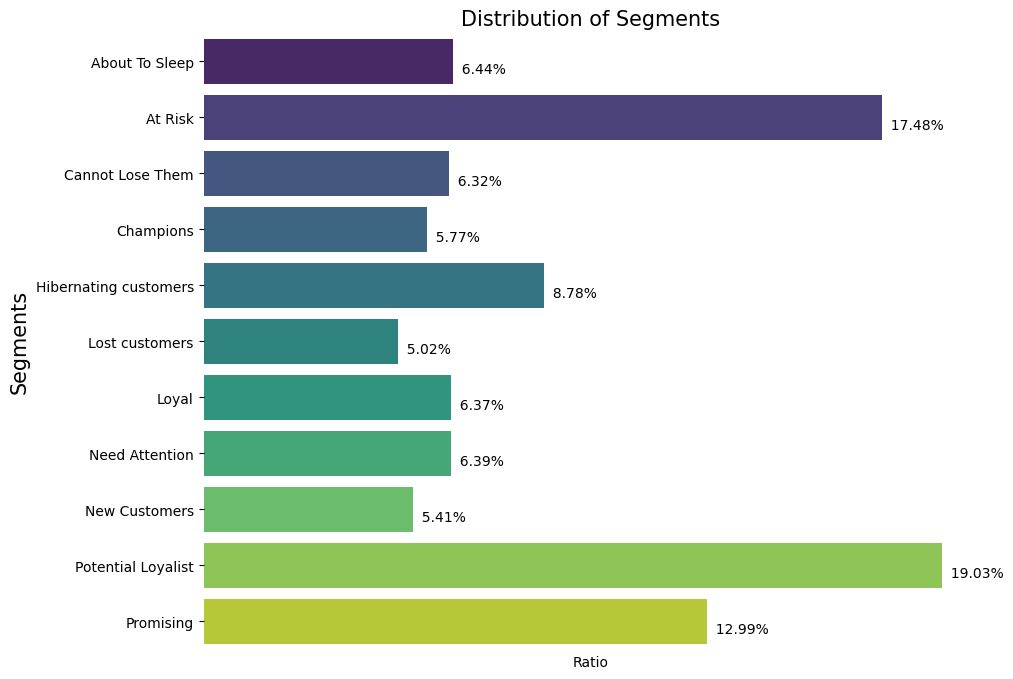

In [99]:
plt.figure(figsize=(10,8))
per= sns.barplot(x=rfm_Stats['Ratio'], y=rfm_Stats.index, data=rfm_Stats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(rfm_Stats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=15)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=15)
plt.show()

In [100]:
import squarify

Text(0.5, 0.98, 'Recency and Frequency Grid')

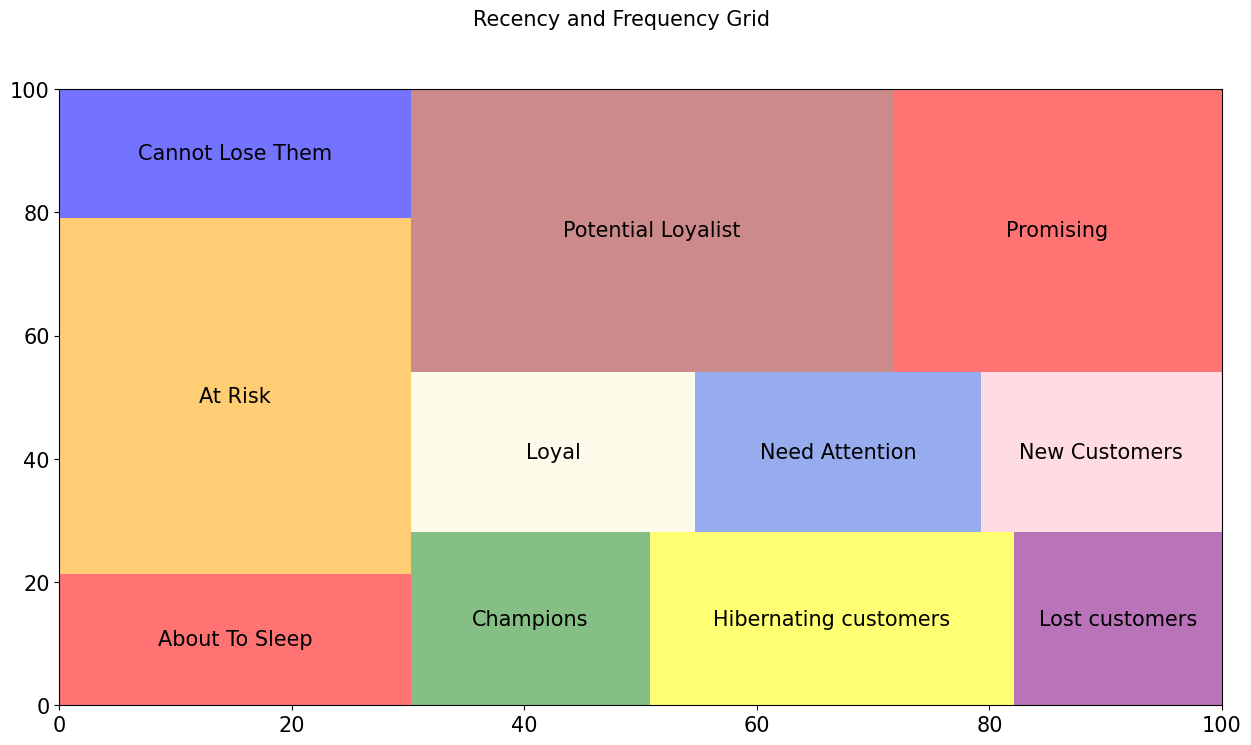

In [101]:
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=rfm_Stats["Recency"]["count"], label=rfm_Stats.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=15)


In [102]:
rfm_df3= rfm_df2.drop(["recency_score", "frequency_score", "monetary_score", "rfm_score", "Segment"], axis=1)

In [103]:
rfm_df2['monetary_score'].unique()

[4, 1, 3, 2, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [104]:
from scipy import stats 
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

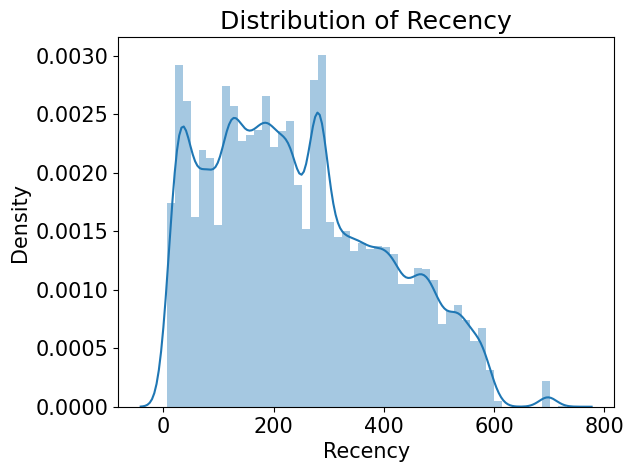

Recency's: Skew: 0.44937022872043947, : SkewtestResult(statistic=52.676195278929086, pvalue=0.0)


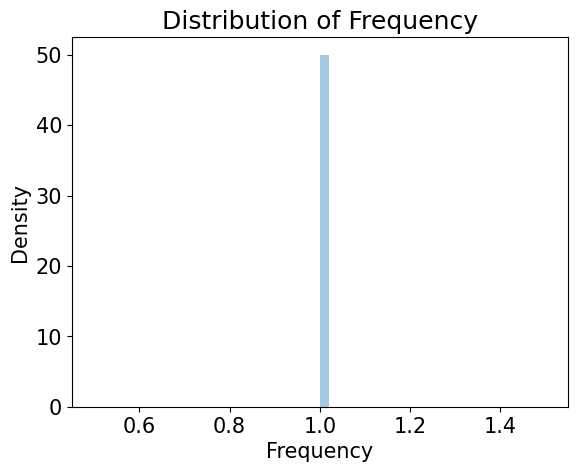

Frequency's: Skew: nan, : SkewtestResult(statistic=nan, pvalue=nan)


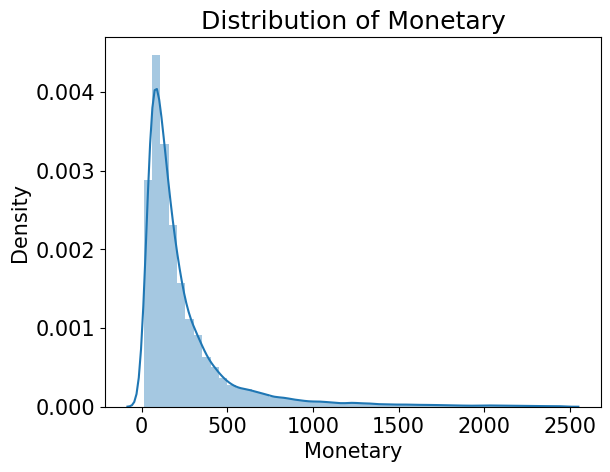

Monetary's: Skew: 3.2522582648177467, : SkewtestResult(statistic=209.45725617445132, pvalue=0.0)


In [105]:
for col in rfm_df3.columns:
    check_skew(rfm_df3, col)

In [106]:
rfm_log= rfm_df3.copy()
for i in rfm_log.columns[1:]:
    rfm_log[i] = np.log10(rfm_log[i])

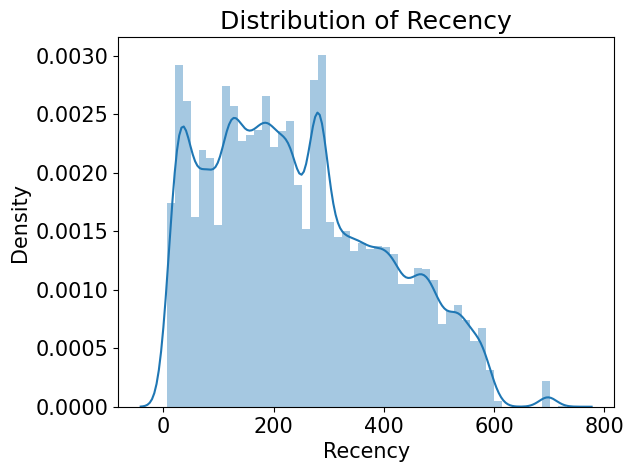

Recency's: Skew: 0.44937022872043947, : SkewtestResult(statistic=52.676195278929086, pvalue=0.0)


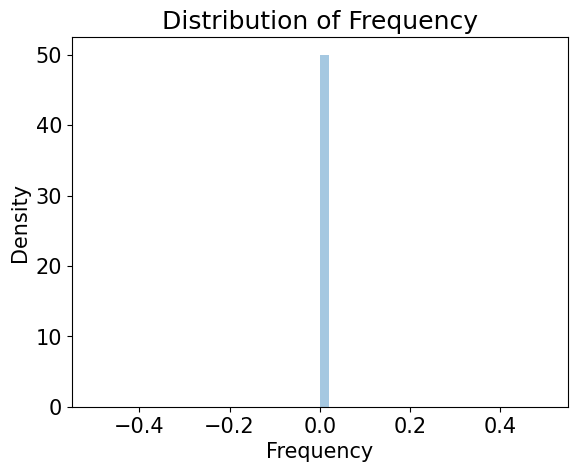

Frequency's: Skew: nan, : SkewtestResult(statistic=nan, pvalue=nan)


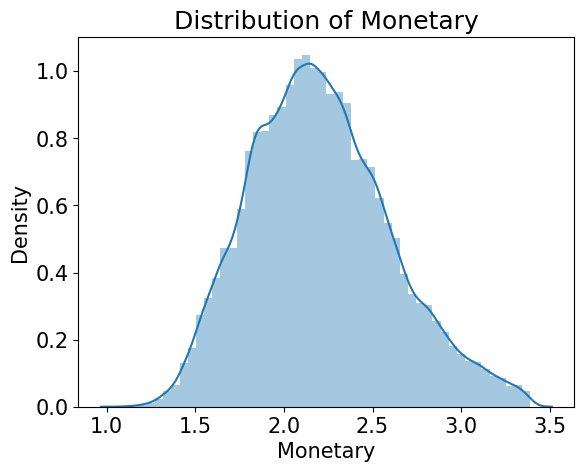

Monetary's: Skew: 0.374086572288484, : SkewtestResult(statistic=44.42908502565409, pvalue=0.0)


In [107]:
for col in rfm_log.columns:
    check_skew(rfm_log, col)

In [108]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

rfm_log_scaled= scaler.fit_transform(rfm_log)
rfm_log_scaled_df= pd.DataFrame(rfm_log_scaled)
rfm_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
rfm_log_scaled_df.head()

,recency,frequency,monetary
0,-0.830763,0.0,0.621486
1,-0.811197,0.0,-1.948741
2,1.947633,0.0,0.075512
3,0.538868,0.0,-0.671185
4,0.323641,0.0,0.220817


In [109]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

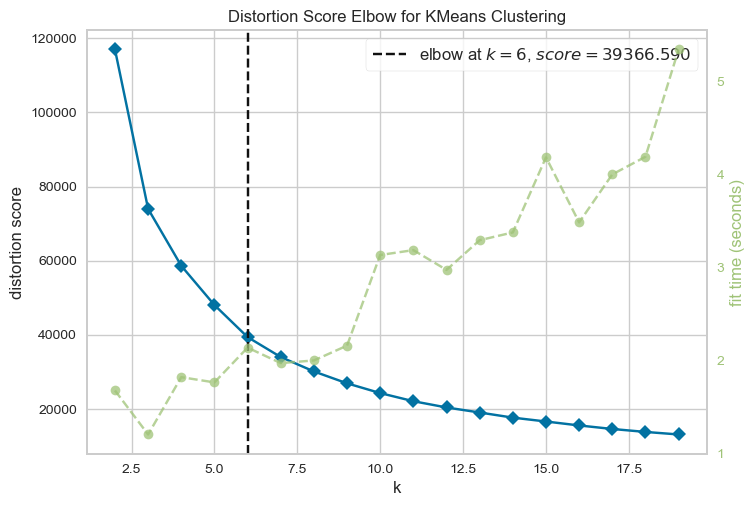

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(rfm_log_scaled_df)
elbow.show()

In [111]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(rfm_log_scaled_df)

KMeans(n_clusters=6)

In [112]:
rfm_log_scaled_df['Cluster']= kmeans.labels_
rfm_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,-0.830763,0.0,0.621486,5
1,-0.811197,0.0,-1.948741,0
2,1.947633,0.0,0.075512,4
3,0.538868,0.0,-0.671185,3
4,0.323641,0.0,0.220817,3


In [113]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [123]:
rfm_df4= rfm_df3.copy()
rfm_df4['Cluster'] = kmeans.labels_+1
rfm_df4

,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,283.80,6
0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,1
0000f46a3911fa3c0805444483337064,543,1,172.44,5
0000f6ccb0745a6a4b88665a16c9f078,327,1,87.24,4
0004aac84e0df4da2b147fca70cf8255,294,1,196.89,4
...,...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,147,1,710.70,3
fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58,4
ffff371b4d645b6ecea244b27531430a,574,1,112.46,5


In [124]:
rfm_df4.groupby('Cluster').agg({'Frequency':['mean'],
                                'Recency':['mean'],
                                'Monetary':['mean']})

,Frequency,Recency,Monetary
,mean,mean,mean
Cluster,,,
1,1.0,159.842491,60.233713
2,1.0,454.541551,468.424239
3,1.0,167.965732,751.157662
4,1.0,272.494554,177.657609
5,1.0,451.489829,87.155747
6,1.0,87.724145,188.981687


#### Cluster 3 has the highest mean monetary value, which means that these customers spend the most money on average. They also have a relatively low mean recency, which means that they have made a purchase recently. These customers are likely to be the most valuable and loyal ones, and they should be rewarded and retained.
#### Cluster 2 has the second highest mean monetary value, but also the highest mean recency. This means that these customers used to spend a lot of money, but they have not made a purchase in a long time. These customers are at risk of churning, and they should be re-engaged with incentives or promotions.
#### Cluster 6 has the lowest mean monetary value, but also the lowest mean recency. This means that these customers make frequent but small purchases. They have the potential to increase their spending, and they should be encouraged with cross-selling or upselling offers.
#### Cluster 4 has a moderate mean monetary value and recency, which means that these customers are neither very active nor very inactive. They are likely to be satisfied but not enthusiastic, and they should be stimulated with personalized recommendations or loyalty programs.
#### Cluster 5 has a low mean monetary value and a high mean recency, which means that these customers make infrequent and small purchases. They are likely to be indifferent or dissatisfied, and they should be surveyed for feedback or offered discounts or free trials.
#### Cluster 1 has a very low mean monetary value and a moderate mean recency, which means that these customers make rare and minimal purchases. They are likely to be uninterested or unaware, and they should be targeted with awareness campaigns or referral schemes

In [115]:
rfm_clusters_stat(rfm_df4)

Recency                  Frequency                Monetary         \
           mean median  min  max      mean median min max     mean median   
Cluster                                                                     
0         160.0  164.0    6  339       1.0    1.0   1   1     60.0   61.0   
1         455.0  450.0  301  730       1.0    1.0   1   1    468.0  350.0   
2         168.0  169.0    6  385       1.0    1.0   1   1    751.0  588.0   
3         272.0  275.0  177  412       1.0    1.0   1   1    178.0  164.0   
4         451.0  447.0  305  730       1.0    1.0   1   1     87.0   80.0   
5          88.0   85.0    6  185       1.0    1.0   1   1    189.0  173.0   

                               
           min     max  count  
Cluster                        
0         13.0   110.0  17453  
1        174.0  2451.0   9735  
2        301.0  2455.0  12344  
3         70.0   404.0  18455  
4         12.0   174.0  13519  
5         77.0   433.0  18807

In [116]:
rfm_stats= pd.DataFrame(rfm_clusters_stat(rfm_df4))

Text(0.5, 0.98, 'Segments of Customers')

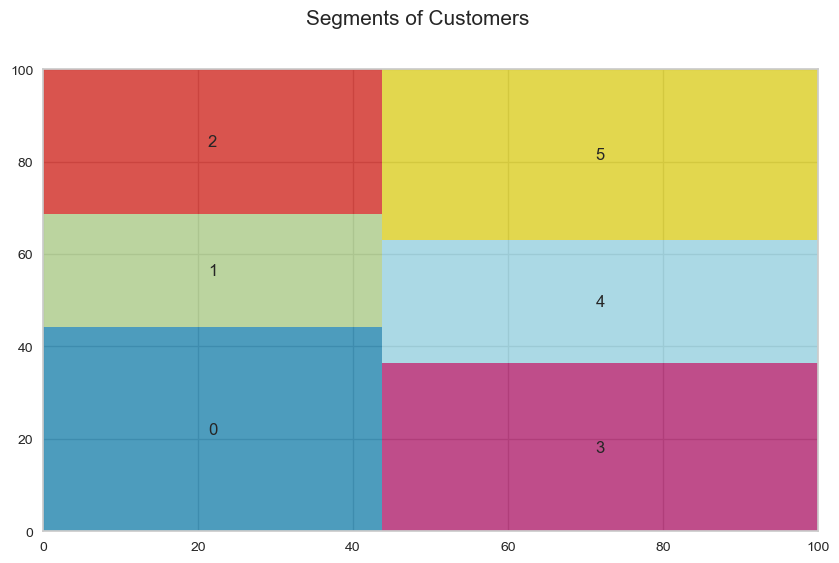

In [117]:
plt.figure(figsize=(10, 6))
squarify.plot(sizes=rfm_stats["Monetary"]["count"], label=rfm_stats.index, color=["b","g","r","m","c", "y"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=15)

In [120]:
rfm_stats.head()


Recency                  Frequency                Monetary         \
           mean median  min  max      mean median min max     mean median   
Cluster                                                                     
0         160.0  164.0    6  339       1.0    1.0   1   1     60.0   61.0   
1         455.0  450.0  301  730       1.0    1.0   1   1    468.0  350.0   
2         168.0  169.0    6  385       1.0    1.0   1   1    751.0  588.0   
3         272.0  275.0  177  412       1.0    1.0   1   1    178.0  164.0   
4         451.0  447.0  305  730       1.0    1.0   1   1     87.0   80.0   

                               
           min     max  count  
Cluster                        
0         13.0   110.0  17453  
1        174.0  2451.0   9735  
2        301.0  2455.0  12344  
3         70.0   404.0  18455  
4         12.0   174.0  13519

In [134]:
review_df

,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26T00:00:00.000000,2017-05-30T22:34:40.000000
1,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15T00:00:00.000000,2018-06-15T12:10:59.000000
2,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15T00:00:00.000000,2018-06-15T12:10:59.000000
3,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29T00:00:00.000000,2018-04-02T18:36:47.000000
4,2518803238cabbf63564593e4a8fc52d,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09T00:00:00.000000,2018-08-14T11:40:54.000000
...,...,...,...,...,...,...
174855,549f0948d29acee5033f72e52f07dc8e,5.0,NaN,NaN,2017-10-17T00:00:00.000000,2017-10-21T01:21:12.000000
174856,549f0948d29acee5033f72e52f07dc8e,5.0,NaN,NaN,2017-10-17T00:00:00.000000,2017-10-21T01:21:12.000000
174857,82ec4a1c6f0134f607033e23431ee298,4.0,NaN,Envio muito rápido. Recomendo.,2017-02-15T00:00:00.000000,2017-02-16T02:54:35.000000
174858,1067a7f22781153115958799dc72a8df,1.0,NaN,"boa tarde produto enviado errado, terei que me...",2017-09-29T00:00:00.000000,2017-09-30T20:49:37.000000


In [137]:
review_df.to_csv('review_df')